In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-elections-dataset/1976-2018-senate.csv
/kaggle/input/us-elections-dataset/usa-2016-presidential-election-by-county.csv
/kaggle/input/us-elections-dataset/us-2016-primary-results.csv
/kaggle/input/us-elections-dataset/2012_US_elect_county.csv


# **Loading Libraries and Dataset**

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

Loading the datasets for the US Election in 2016.

In [3]:
#Loading the datasets
primary_result = pd.read_csv('../input/us-elections-dataset/us-2016-primary-results.csv', sep=';')
primary_result.head(5)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,95000197.0,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,95000204.0,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,95000220.0,Republican,Ted Cruz,46,0.111
3,Vermont,VT,Weston,95000228.0,Republican,John Kasich,32,0.471
4,Vermont,VT,Whiting,95000233.0,Republican,Ben Carson,0,0.000


We check for total number of missing values in the primary result

In [4]:
#Checking is there are missing values
missing_values = primary_result.isnull().sum()
missing_values

state                   0
state_abbreviation      0
county                  0
fips                  100
party                   0
candidate               0
votes                   0
fraction_votes          0
dtype: int64

# **Data Cleaning**

Drop columns that are not important

In [5]:
primary_result.drop(columns=['fips'], inplace=True)
primary_result.head(5)

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,Republican,Ted Cruz,46,0.111
3,Vermont,VT,Weston,Republican,John Kasich,32,0.471
4,Vermont,VT,Whiting,Republican,Ben Carson,0,0.000


We take the total number of votes during the Us Election 2016 Primary

In [6]:
#Lets see the total number of votes casted in the primary
primary_result.votes.sum()

56759187

In [7]:
#Number of counts of Republicans and Democrats
primary_result['party'].value_counts()

Republican    15652
Democrat       8959
Name: party, dtype: int64

# **Data Visualization**

We take a state from the primary result for a start. Let's take Vermont.

# **Vermont**

The total number of votes casted in Vermont

In [8]:
#Let's take a look at Vermont
vermont = primary_result.loc[primary_result.state.isin(['Vermont'])]
vermont.head(5)

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,Republican,Ted Cruz,46,0.111
3,Vermont,VT,Weston,Republican,John Kasich,32,0.471
4,Vermont,VT,Whiting,Republican,Ben Carson,0,0.000


In [9]:
vermont.votes.sum()

192960

Let's see the total number of votes casted for each candidate in Vermont during the primary

In [10]:
votes = vermont.groupby('candidate')['votes'].sum().reset_index()
Votes_Vermont = votes.sort_values('votes',ascending=False)
Votes_Vermont

,candidate,votes
1,Bernie Sanders,115863
2,Donald Trump,19968
4,John Kasich,18543
3,Hillary Clinton,18335
5,Marco Rubio,11778
6,Ted Cruz,5929
0,Ben Carson,2544


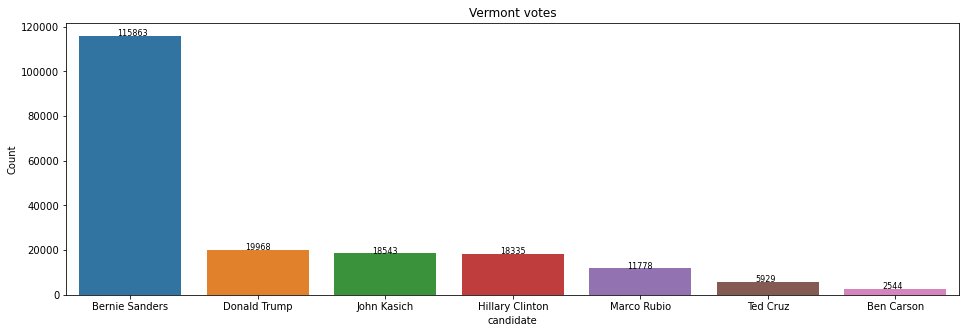

In [11]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Votes_Vermont,x = 'candidate',y = 'votes', ax = ax)
ax.set_ylabel('Count')
ax.set_title('Vermont votes')
for index,Votes_Vermont in enumerate(Votes_Vermont['votes'].astype(int)):
       ax.text(x=index-0.1 , y =Votes_Vermont+2 , s=f"{Votes_Vermont}" , fontdict=dict(fontsize=8))
plt.show()

We can see that Bernie Sanders had the highest number of votes in Vermont, whiles Ben Carson had the least number of votes.

# **Party**

Let's check out which party received more votes in Vermont

In [12]:
ver_m = vermont.party.value_counts().reset_index()

import plotly.express as px
fig = px.pie(ver_m, values=ver_m['party'], names=ver_m['index'])
fig.update_layout(title = 'Party with Most Votes in Vermont')
fig.show()

It's obvious the Republicans got most of the votes casted in Vermont.

Let's see the total votes casted for each candidate in the US 2016 Primary

In [13]:
primary = primary_result.groupby('candidate')['votes'].sum().reset_index()
Primary = primary.sort_values('votes',ascending=False).head(5)
Primary.head()

,candidate,votes
5,Hillary Clinton,15692452
4,Donald Trump,13302541
1,Bernie Sanders,11959102
14,Ted Cruz,7603006
7,John Kasich,4159949


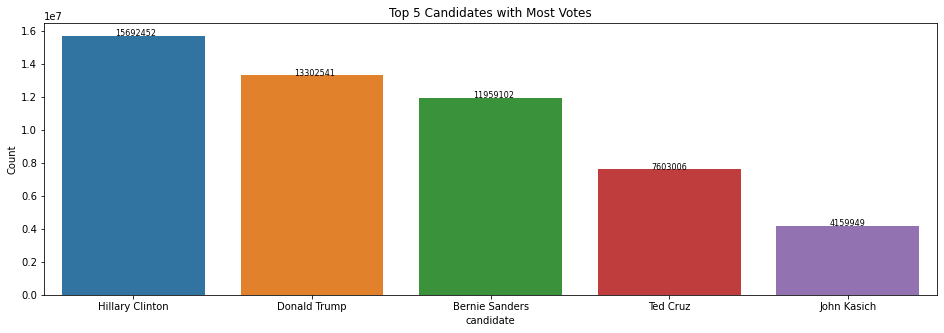

In [14]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Primary,x = 'candidate',y = 'votes', ax = ax)
ax.set_ylabel('Count')
ax.set_title('Top 5 Candidates with Most Votes')
for index,Primary in enumerate(Primary['votes'].astype(int)):
       ax.text(x=index-0.1 , y =Primary+2 , s=f"{Primary}" , fontdict=dict(fontsize=8))
plt.show()

We see that Hillary Clinton got the highest number of votes in the US 2016 Primary. Donald Trump, being the second.

# **States**

Now, we want to see the total number of votes in each state in the US 2016 Election Primary.

In [15]:
state = primary_result.groupby('state')['votes'].sum().reset_index()
States = state.sort_values('votes',ascending=False).head(10)
States

,state,votes
4,California,4938197
41,Texas,4147889
8,Florida,3940929
12,Illinois,3372537
33,Ohio,3204172
36,Pennsylvania,3176340
30,New York,2686539
21,Michigan,2431111
31,North Carolina,2185747
47,Wisconsin,2073402


In [16]:
fig = px.pie(States, values=States['votes'], names=States['state'])
fig.update_layout(title = 'Top 10 States with Most Votes')
fig.show()

We see that the state with the highest number of votes casted is Califonia and the North Dakota being the state with the least number of votes

# **County**

Let's see the county with the highest number of votes

In [17]:
county = primary_result.groupby('county')['votes'].sum().reset_index()
County = county.sort_values('votes',ascending=False).head(10)
County

,county,votes
1347,Los Angeles,1268622
1539,Montgomery,823976
434,Chicago,760894
1713,Orange,740240
520,Cook Suburbs,678313
1174,Jefferson,635690
1033,Harris,545932
2477,Wayne,522322
861,Franklin,488365
1407,Maricopa,464471


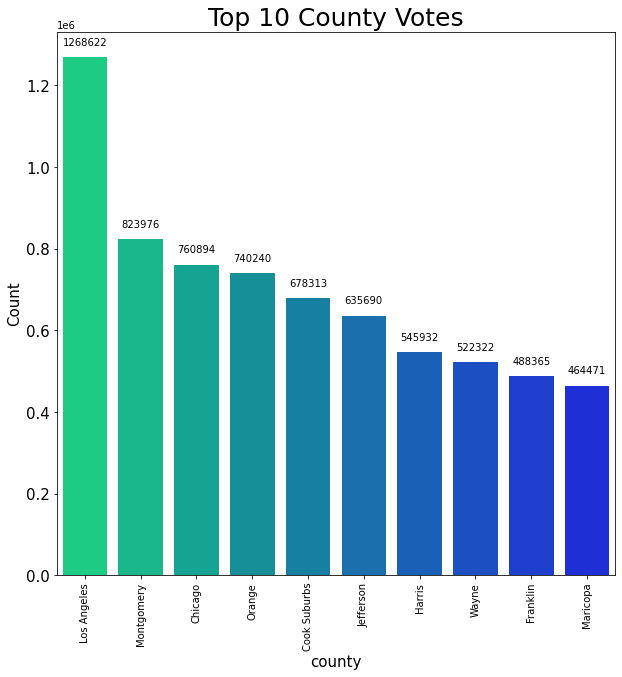

In [18]:
plt.subplots(figsize=(10,10))
splot = sns.barplot(x=County['county'],y=County['votes'], palette = 'winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.xlabel('county',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Top 10 County Votes',fontsize=25);

So Los Angeles is the county with the highest number of votes.

Since Hillary Clinton had the highest number of votes in the Us Election 2016 Primary, Let's see the states with the highest and smallest number of votes she had in each state.

In [19]:
Hill_cl = primary_result.loc[primary_result.candidate.isin(['Hillary Clinton'])]
Hill_cl.head(5)

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
9,Virginia,VA,Albemarle,Democrat,Hillary Clinton,8284,0.545
10,Virginia,VA,Dinwiddie,Democrat,Hillary Clinton,1935,0.833
11,Virginia,VA,Frederick,Democrat,Hillary Clinton,2136,0.505
12,Virginia,VA,Nelson,Democrat,Hillary Clinton,991,0.562
14,Virginia,VA,Poquoson,Democrat,Hillary Clinton,295,0.465


In [20]:
state = Hill_cl.groupby(['state','state_abbreviation'])['votes'].sum().reset_index()
Hill_state_max = state.sort_values('votes',ascending=False).head(15)
Hill_state_max

,state,state_abbreviation,votes
4,California,CA,1940580
8,Florida,FL,1097400
30,New York,NY,1054083
12,Illinois,IL,1012175
41,Texas,TX,935080
36,Pennsylvania,PA,918689
33,Ohio,OH,679266
31,North Carolina,NC,616383
20,Massachusetts,MA,603784
21,Michigan,MI,576795


In [21]:
import plotly.express as px

fig = px.choropleth(locations= ['CA','FL','NY','IL','TX','PA','OH','NC','MA','MI','NJ','GA','MD','VA','WI'], 
                    locationmode="USA-states", 
                    color= Hill_state_max['votes'],
                    labels={'color':'votes', 'locations':'State'},
                    scope="usa") 


fig.update_layout(
    
    title_text = 'Top 15 States with Most Votes',
    geo_scope='usa'
)
fig.show()

In [22]:
Hill_state_min = state.sort_values('votes',ascending=True).head(5)
Hill_state_min

,state,state_abbreviation,votes
1,Alaska,AK,99
32,North Dakota,ND,101
48,Wyoming,WY,124
18,Maine,ME,1214
11,Idaho,ID,5065


Text(0.5, 1.0, 'Bottom 5 states with Less Votes')

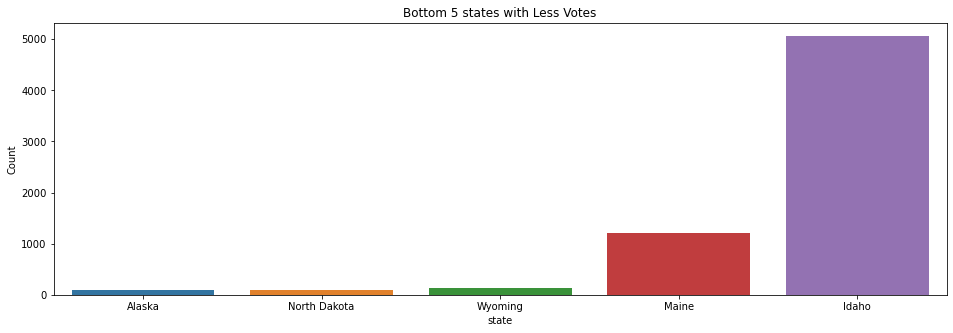

In [23]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Hill_state_min,x = 'state',y = 'votes', ax = ax)
ax.set_ylabel('Count')
ax.set_title('Bottom 5 states with Less Votes')

We can see that Hillary Clinton had most of her votes in Califonia and Alaska happens to be the state where she had the least votes in Us Election 2016 Primary.

# **Fraction Votes**

Lets see the average fraction votes Hillary had for each state

In [24]:
hillary = Hill_cl.groupby(['state','state_abbreviation'])['fraction_votes'].mean().reset_index()
Hillary = hillary.sort_values('fraction_votes',ascending=False).head(10)
Hillary

,state,state_abbreviation,fraction_votes
22,Mississippi,MS,0.827866
38,South Carolina,SC,0.785326
0,Alabama,AL,0.761269
9,Georgia,GA,0.735182
17,Louisiana,LA,0.672484
3,Arkansas,AR,0.639773
44,Virginia,VA,0.638421
40,Tennessee,TN,0.637768
41,Texas,TX,0.634913
28,New Jersey,NJ,0.600000


Text(0.5, 1.0, 'Top 10 states with Most Fraction Votes')

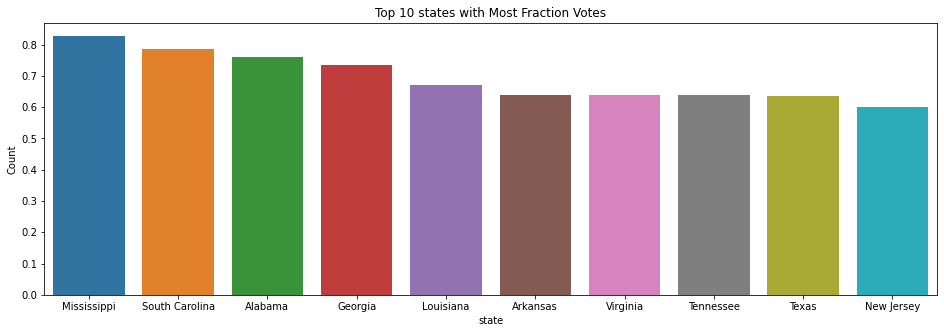

In [25]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Hillary,x = 'state',y = 'fraction_votes', ax = ax)
ax.set_ylabel('Count')
ax.set_title('Top 10 states with Most Fraction Votes')

**If this notebook was helpful, please upvote!. Thanks**